<a href="https://colab.research.google.com/github/meredityman/ML_Examples/blob/master/CPPN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import tensorflow as tf

tf.keras.backend.clear_session()
sess = tf.InteractiveSession()

class MyModel(tf.keras.Model):

  def __init__(self, depth, size, latent_size, channels):
    super(MyModel, self).__init__()

    self.first = tf.keras.layers.Dense( 
        size , 
        input_shape=(3 + latent_size, ), 
        activation=tf.nn.tanh,
        kernel_initializer ='glorot_uniform',
        bias_initializer   ='glorot_uniform'
    )

    self.dense = []
    for i in range(size - 1):
      self.dense.append( 
          tf.keras.layers.Dense(
              size, 
              activation=tf.nn.tanh,
              kernel_initializer ='glorot_uniform',
              bias_initializer   ='glorot_uniform'              
              )
          )


    self.last = tf.keras.layers.Dense(
        channels, 
        activation=tf.nn.sigmoid,
        kernel_initializer ='glorot_uniform',
        bias_initializer   ='glorot_uniform' 
      )

  def call(self, inputs):
    x = self.first(inputs)
    for i in range(len(self.dense)):
        x  = self.dense[i](x )

    x  = self.last(x )
    return x 

  def reset_weights(model):
    for layer in model.layers: 
        if hasattr(layer, 'kernel_initializer'):
            layer.kernel.initializer.run()
        if hasattr(layer, 'bias_initializer'):
            layer.bias.initializer.run()


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


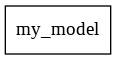

In [39]:
DEPTH = 10
SIZE  = 15
LATENT_SIZE = 6
CHANNELS = 4

model = MyModel(DEPTH, SIZE, LATENT_SIZE, CHANNELS)

tf.keras.utils.plot_model(model, show_shapes=True)


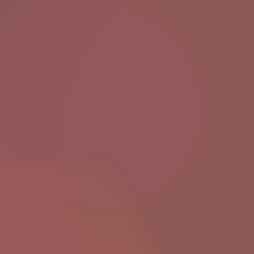

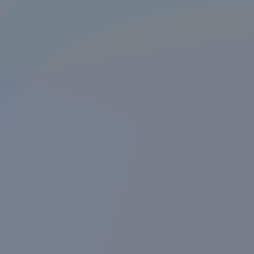

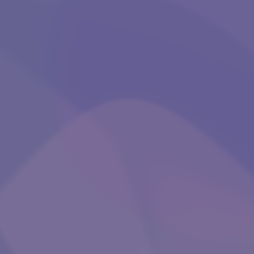

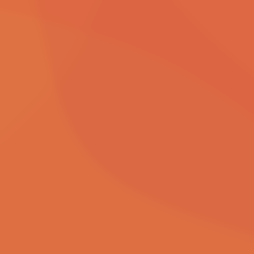

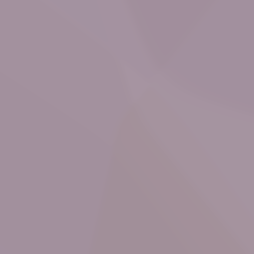

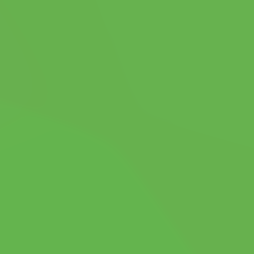

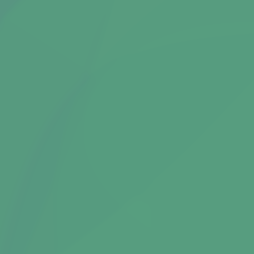

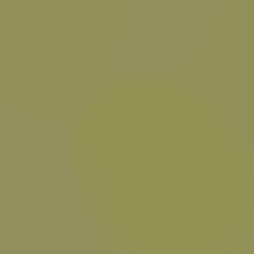

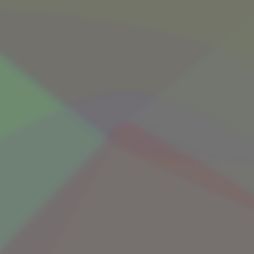

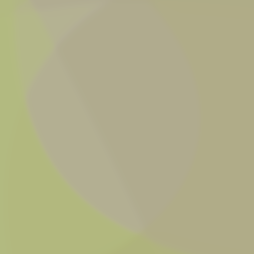

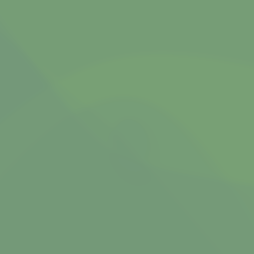

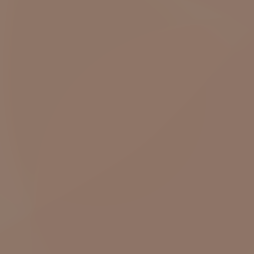

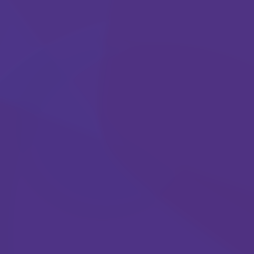

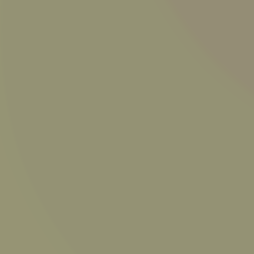

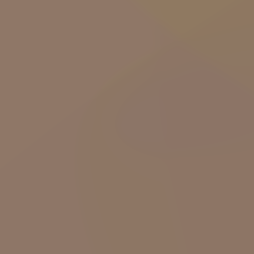

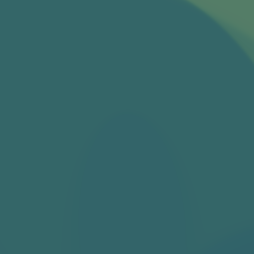

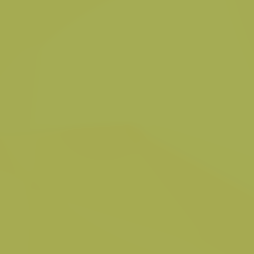

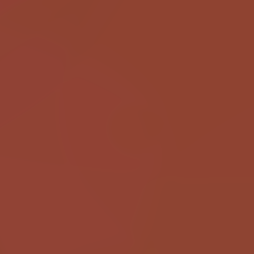

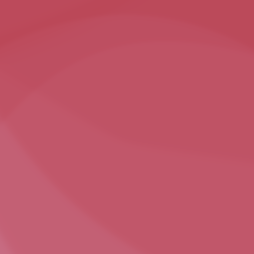

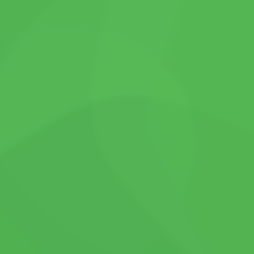

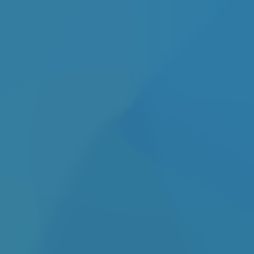

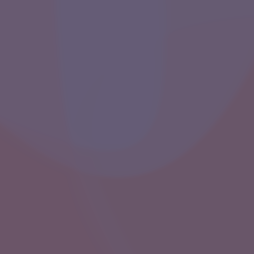

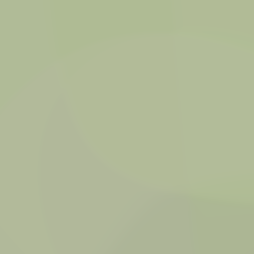

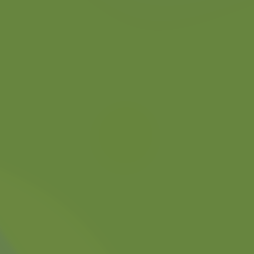

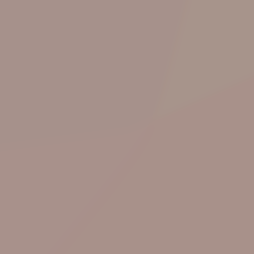

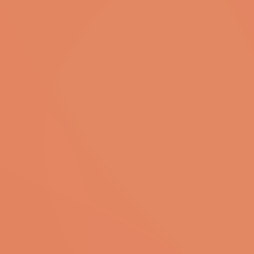

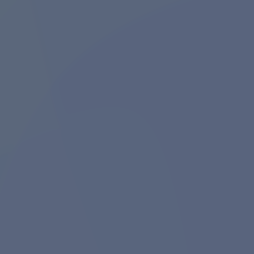

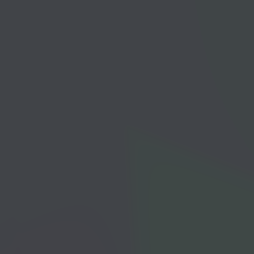

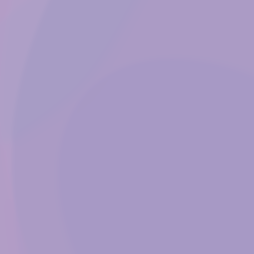

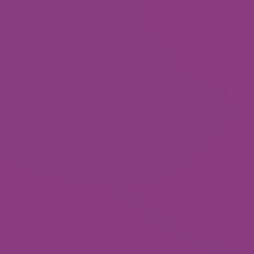

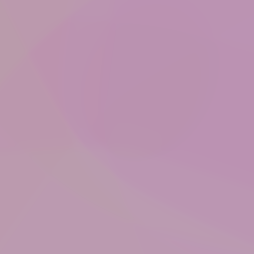

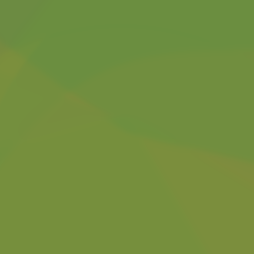

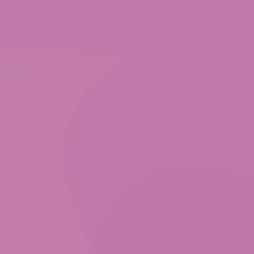

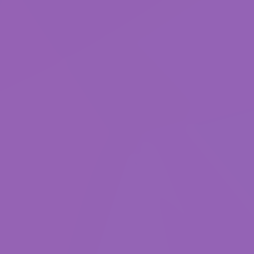

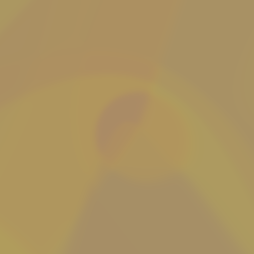

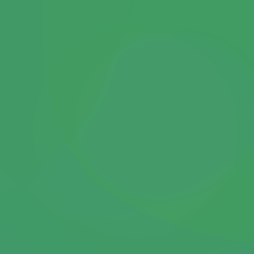

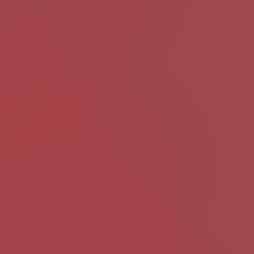

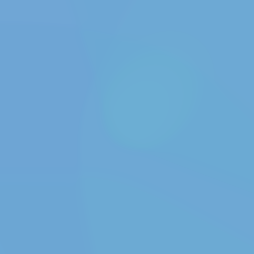

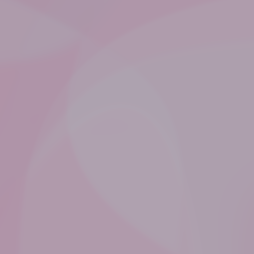

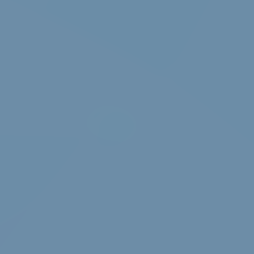

In [43]:
from PIL import Image
import numpy as np

HEIGHT  = WIDTH = 254
SAMPLES = 40

x = np.linspace(-1, 1, WIDTH).astype( np.float32)
y = np.linspace(-1, 1, HEIGHT).astype( np.float32)
x_coords, y_coords = np.meshgrid(x, y)

x_coords = np.reshape(x_coords, [-1])
y_coords = np.reshape(y_coords, [-1])
r_coords = np.sqrt(np.square(x_coords) + np.square(y_coords))

coords = np.stack((x_coords, y_coords, r_coords), axis=1)

for i in range(SAMPLES):
  latents = 60 * np.tile(np.random.normal(0.0, 1.0, LATENT_SIZE -1), (coords.shape[0], 1))

  sc_coords = coords * 60 + 60

  batch = np.concatenate((sc_coords, latents), axis = 1)

  pixels = model.predict(batch)
  pixels = pixels.reshape((WIDTH, HEIGHT, 4))

  image = Image.fromarray(np.uint8(pixels*255), mode="RGBA").convert(mode = "RGB")
  image = image.resize((HEIGHT, WIDTH))
  display(image)

  model.reset_weights()


